## Machine Learning Lab 4 CNN
### 11510726 毛煦冰

In [1]:
from __future__ import division, print_function, absolute_import

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/Users/apple/Desktop/机器学习作业/ML_Lab_NN/data/", one_hot=True)

import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/apple/Desktop/机器学习作业/ML_Lab_NN/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /Users/apple/Desktop/机器学习作业/ML_Lab_NN/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /Users/apple/Desktop/机器学习作业/ML_Lab_NN/data/t10k-images-idx3-ubyte.gz
Extracting /Users/apple/Desktop/机器学习作业/ML_Lab_NN/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
# Training Parameters
learning_rate = 0.001
num_steps = 200
batch_size = 128
display_step = 10

# Network Parameters
num_input = 784
num_classes = 10
dropout = 0.75

In [3]:
X = tf.placeholder(tf.float32, [None, num_input])
Y = tf.placeholder(tf.float32, [None, num_classes])
keep_prob = tf.placeholder(tf.float32)

In [4]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

In [5]:
def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='SAME')

In [6]:
def conv_net(x, weights, biases, dropout):
    x = tf.reshape(x, shape=[-1, 28, 28, 1])

    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [7]:
weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    'out': tf.Variable(tf.random_normal([1024, num_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

In [8]:
# Model
logits = conv_net(X, weights, biases, keep_prob)
prediction = tf.nn.softmax(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [9]:
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [10]:
init = tf.global_variables_initializer()

# Start training
with tf.Session() as sess:
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y, keep_prob: 0.8})
        if step % display_step == 0 or step == 1:
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y,
                                                                 keep_prob: 1.0})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

    print("Optimization Finished!")

    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images[:256],
                                      Y: mnist.test.labels[:256],
                                      keep_prob: 1.0}))

Step 1, Minibatch Loss= 61275.7031, Training Accuracy= 0.164
Step 10, Minibatch Loss= 24297.4375, Training Accuracy= 0.266
Step 20, Minibatch Loss= 11658.5859, Training Accuracy= 0.484
Step 30, Minibatch Loss= 6517.2231, Training Accuracy= 0.617
Step 40, Minibatch Loss= 5123.2793, Training Accuracy= 0.742
Step 50, Minibatch Loss= 5052.8047, Training Accuracy= 0.750
Step 60, Minibatch Loss= 3443.0840, Training Accuracy= 0.781
Step 70, Minibatch Loss= 2497.9575, Training Accuracy= 0.828
Step 80, Minibatch Loss= 2957.2646, Training Accuracy= 0.844
Step 90, Minibatch Loss= 1546.5166, Training Accuracy= 0.914
Step 100, Minibatch Loss= 1935.3900, Training Accuracy= 0.859
Step 110, Minibatch Loss= 2125.1665, Training Accuracy= 0.883
Step 120, Minibatch Loss= 2219.0205, Training Accuracy= 0.891
Step 130, Minibatch Loss= 1081.8143, Training Accuracy= 0.891
Step 140, Minibatch Loss= 2032.3396, Training Accuracy= 0.891
Step 150, Minibatch Loss= 812.3031, Training Accuracy= 0.914
Step 160, Minibat

In [11]:
summary_writer = tf.summary.FileWriter("/Users/apple/Desktop/机器学习作业/ML_Lab_NN/data/log/", sess.graph)
summary_writer.close()

**Reference:https://colab.research.google.com
  PreLab NN and github**

![title](graph_large_attrs_key.png)

<img src="1.png" width="40%">
<img src="2.png" width="40%">
<img src="3.png" width="40%">
<img src="4.png" width="40%">
<img src="5.png" width="40%">
<img src="6.png" width="40%">

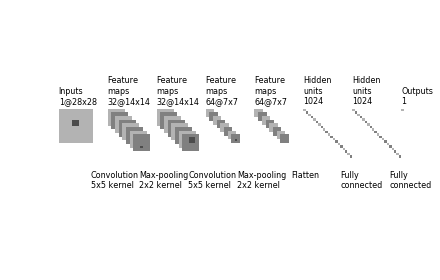

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcdefaults()
from matplotlib.lines import Line2D
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
%matplotlib inline

NumConvMax = 8
NumFcMax = 20
White = 1.
Light = 0.7
Medium = 0.5
Dark = 0.3
Black = 0.


def add_layer(patches, colors, size=24, num=5,
              top_left=[0, 0],
              loc_diff=[3, -3],
              ):
    # add a rectangle
    top_left = np.array(top_left)
    loc_diff = np.array(loc_diff)
    loc_start = top_left - np.array([0, size])
    for ind in range(num):
        patches.append(Rectangle(loc_start + ind * loc_diff, size, size))
        if ind % 2:
            colors.append(Medium)
        else:
            colors.append(Light)


def add_mapping(patches, colors, start_ratio, patch_size, ind_bgn,
                top_left_list, loc_diff_list, num_show_list, size_list):

    start_loc = top_left_list[ind_bgn] \
        + (num_show_list[ind_bgn] - 1) * np.array(loc_diff_list[ind_bgn]) \
        + np.array([start_ratio[0] * size_list[ind_bgn],
                    -start_ratio[1] * size_list[ind_bgn]])

    end_loc = top_left_list[ind_bgn + 1] \
        + (num_show_list[ind_bgn + 1] - 1) \
        * np.array(loc_diff_list[ind_bgn + 1]) \
        + np.array([(start_ratio[0] + .5 * patch_size / size_list[ind_bgn]) *
                    size_list[ind_bgn + 1],
                    -(start_ratio[1] - .5 * patch_size / size_list[ind_bgn]) *
                    size_list[ind_bgn + 1]])

    patches.append(Rectangle(start_loc, patch_size, patch_size))
    colors.append(Dark)
    patches.append(Line2D([start_loc[0], end_loc[0]],
                          [start_loc[1], end_loc[1]]))
    colors.append(Black)
    patches.append(Line2D([start_loc[0] + patch_size, end_loc[0]],
                          [start_loc[1], end_loc[1]]))
    colors.append(Black)
    patches.append(Line2D([start_loc[0], end_loc[0]],
                          [start_loc[1] + patch_size, end_loc[1]]))
    colors.append(Black)
    patches.append(Line2D([start_loc[0] + patch_size, end_loc[0]],
                          [start_loc[1] + patch_size, end_loc[1]]))
    colors.append(Black)


def label(xy, text, xy_off=[0, 4]):
    plt.text(xy[0] + xy_off[0], xy[1] + xy_off[1], text,
             family='sans-serif', size=8)


if __name__ == '__main__':

    fc_unit_size = 2
    layer_width = 40

    patches = []
    colors = []

    fig, ax = plt.subplots()


    size_list = [28, 14, 14, 7, 7]
    num_list = [1, 32, 32, 64, 64]
    x_diff_list = [0, layer_width, layer_width, layer_width, layer_width]
    text_list = ['Inputs'] + ['Feature\nmaps'] * (len(size_list) - 1)
    loc_diff_list = [[3, -3]] * len(size_list)

    num_show_list = list(map(min, num_list, [NumConvMax] * len(num_list)))
    top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]

    for ind in range(len(size_list)):
        add_layer(patches, colors, size=size_list[ind],
                  num=num_show_list[ind],
                  top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
        label(top_left_list[ind], text_list[ind] + '\n{}@{}x{}'.format(
            num_list[ind], size_list[ind], size_list[ind]))


    start_ratio_list = [[0.4, 0.5], [0.4, 0.8], [0.4, 0.5], [0.4, 0.8]]
    patch_size_list = [5, 2, 5, 2]
    ind_bgn_list = range(len(patch_size_list))
    text_list = ['Convolution', 'Max-pooling', 'Convolution', 'Max-pooling']

    for ind in range(len(patch_size_list)):
        add_mapping(patches, colors, start_ratio_list[ind],
                    patch_size_list[ind], ind,
                    top_left_list, loc_diff_list, num_show_list, size_list)
        label(top_left_list[ind], text_list[ind] + '\n{}x{} kernel'.format(
            patch_size_list[ind], patch_size_list[ind]), xy_off=[26, -65])


    size_list = [fc_unit_size, fc_unit_size, fc_unit_size]
    num_list = [1024, 1024, 1]
    num_show_list = list(map(min, num_list, [NumFcMax] * len(num_list)))
    x_diff_list = [sum(x_diff_list) + layer_width, layer_width, layer_width]
    top_left_list = np.c_[np.cumsum(x_diff_list), np.zeros(len(x_diff_list))]
    loc_diff_list = [[fc_unit_size, -fc_unit_size]] * len(top_left_list)
    text_list = ['Hidden\nunits'] * (len(size_list) - 1) + ['Outputs']

    for ind in range(len(size_list)):
        add_layer(patches, colors, size=size_list[ind], num=num_show_list[ind],
                  top_left=top_left_list[ind], loc_diff=loc_diff_list[ind])
        label(top_left_list[ind], text_list[ind] + '\n{}'.format(
            num_list[ind]))

    text_list = ['Flatten\n', 'Fully\nconnected', 'Fully\nconnected']

    for ind in range(len(size_list)):
        label(top_left_list[ind], text_list[ind], xy_off=[-10, -65])

    colors += [0, 1]
    collection = PatchCollection(patches, cmap=plt.cm.gray)
    collection.set_array(np.array(colors))
    ax.add_collection(collection)
    plt.tight_layout()
    plt.axis('equal')
    plt.axis('off')
    plt.show()
    fig.set_size_inches(8, 2.5)

    fig_dir = './'
    fig_ext = '.png'
    fig.savefig(os.path.join(fig_dir, 'convnet_fig' + fig_ext),
bbox_inches='tight', pad_inches=0)

##### Reference：https://blog.csdn.net/u013719780/article/details/53197462

NN's Accuracy is 0.9371 and CNN's Accuracy is 0.94140625 which is better than NN. The layer structure of NN is one-dimensional, and the layer structure of CNN is high-dimensional. NN deals with "linear" data, and CNN is intuitively more suitable for "structural" data. Fully connection will lead to some unreasonable result when dealing with figure. In the other hand, the point in figure almost only related to nearby point so i think thats why CNN is better than NN.